<a href="https://colab.research.google.com/github/SarahGoddaer/Machine_Learning_course_UGent_D012554_kaggle/blob/master/Kaggle_eye_blinking_prediciton_workinprogress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color='red'>WORK IN PROGRESS:</font> Final report: Kaggle eye blinking prediciton.**

In this report, I will point out the models and techniques I used to fit the traindata and with which I made accurate predictions during these six days.

I will mainly explain 2 models, *Support Vector Machine* and the *KNeighbors Classifier* in detail. Afterwards, I mention a stacking method and a technique using the Voting Classifier from sklearn.

## Support Vector Machine (SVM)

### **Loading data**

This is the first step. I load the trainset and the testset at the same time. Additionally, I save the data into understandable variables and I visualize it to have a first look. This first impression gives me the opportunity to get used to this data.   

In [0]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn import metrics

#Loading data
trainset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_train.csv")
testset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_test.csv")

#Get features dataframe
features = trainset.copy()
features.pop('label')
feature_names = list(features.columns)

#Get test features without the index column
test_features = testset.copy()
test_features.pop('index')
test_feature_names = list(test_features.columns)

In [16]:
print(features.shape)
print(test_features.shape)
features.head()

(2000, 14)
(12892, 14)


,AF3,F7,F3,FC5,T7,P7,O1,02,P8,T8,FC6,F4,F8,AF4
0,4299.49,3997.44,4277.95,4116.92,4353.85,4623.08,4100.00,4623.59,4202.56,4229.23,4211.79,4278.97,4600.00,4369.23
1,4302.05,3985.64,4261.03,4129.74,4334.36,4615.38,4072.31,4585.64,4192.31,4225.13,4195.90,4283.08,4607.18,4358.46
2,4321.03,4015.90,4265.13,4122.56,4333.33,4613.33,4072.82,4602.05,4192.31,4223.08,4155.38,4286.15,4608.21,4371.79
3,4408.21,4104.10,4380.00,4232.31,4449.74,4750.26,4169.23,4731.28,4311.28,4352.31,4319.49,4388.21,4715.90,4464.10
4,4347.18,3975.38,4266.67,4102.56,4333.33,4617.95,4097.44,4612.82,4210.77,4240.51,4248.21,4313.33,4664.10,4411.79


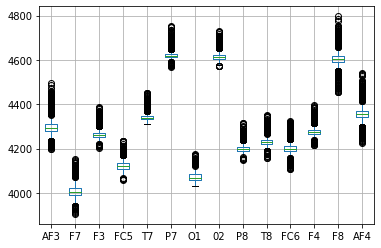

In [7]:
features.boxplot()

In [13]:
#How many measurements are there of the two classes?
print(trainset.label.value_counts())
#Are there missing values in some features?
print(features.isnull().sum()) 

0    1099
1     901
Name: label, dtype: int64
AF3    0
F7     0
F3     0
FC5    0
T7     0
P7     0
O1     0
02     0
P8     0
T8     0
FC6    0
F4     0
F8     0
AF4    0
dtype: int64


I can see from this that the ranges of the different features are not the same, so scaling will be appropriate to use if I want to perform predictions with SVM. Also, I now know that the trainset and testset indeed have 14 features and that the trainset is much smaller than the testset. 1099 instances of this trainset belong to class 0 (open eyes) and 901 instances belong to class 1 (eyes closed).  